# Data Sourcing and Division

In [1]:
# Importing Libraries
import io
import requests
import pandas as pd 

In [2]:
# Obtaining the Data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSc_2y5N0I67wDU38DjDh35IZSIS30rQf7_NYZhtYYGU1jJYT6_kDx4YpF-qw0LSlGsBYP8pqM_a1Pd/pub?output=csv'
res = requests.get(url)
raw_data = pd.read_csv(io.BytesIO(res.content), sep=',')
data = raw_data[['Detected State','Detected City']]

In [3]:
# Dividing the Data
MH_Data = data[data['Detected State'] == 'Maharashtra']
MH_Data = MH_Data.dropna()

TN_Data = data[data['Detected State'] == 'Tamil Nadu']
TN_Data = TN_Data.dropna()

DL_Data = data[data['Detected State'] == 'Delhi']
DL_Data = DL_Data.dropna()

MP_Data = data[data['Detected State'] == 'Madhya Pradesh']
MP_Data = MP_Data.dropna()

# Creating Required Data Frames

In [4]:
'''
Creating Required Data Frame(s)
'''

def divide(DF):
    LST = []
    # 'x' will have all the names of Cities in the State
    for x in DF['Detected City'].unique():
        # 'temp' is a DataFrame that contains details of the Current City
        temp = DF[DF['Detected City']==x]
        # The List 'DF' contains sub-lists with 'Name of City' and 'Number of Registered Cases'
        LST.append([x,temp['Detected City'].count()])
    # Converting the Nested List into a DataFrame
    DF_df = pd.DataFrame(LST)
    # Defining the Column Names
    DF_df.columns = ['City_Name','Number_Of_Patients']
    # Arranging the DataFrame in Descending Order to Obtain Cities with Max Cases on Top
    DF_df = DF_df.sort_values(by=['Number_Of_Patients'],ascending=False)
    return DF_df

# Maharashtra Data Frame
MH_df = divide(MH_Data)

# Tamil Nadu Data Frame
TN_df = divide(TN_Data)

# Delhi Data Frame
DL_df = divide(DL_Data)

# Madhya Pradesh Data Frame
MP_df = divide(MP_Data)

# Data Visualization

In [5]:
# Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

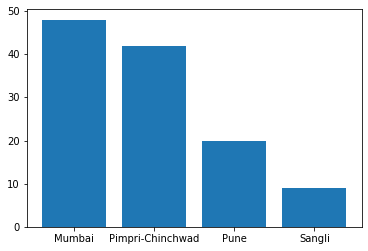

In [6]:
'''
Maharashtra
'''
# Defining a Bar Graph
plt.bar(MH_df[:4]['City_Name'], MH_df[:4]['Number_Of_Patients'])

# Print the Graph
plt.show()

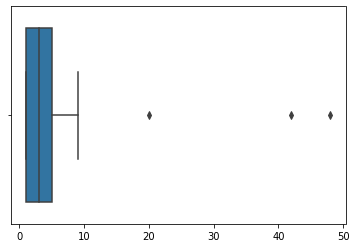

In [7]:
sns.boxplot(MH_df[['Number_Of_Patients']])

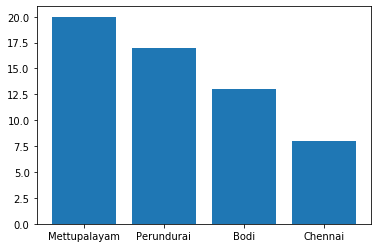

In [8]:
'''
Tamil Nadu
'''
# Defining a Bar Graph
plt.bar(TN_df[:4]['City_Name'], TN_df[:4]['Number_Of_Patients'])

# Print the Graph
plt.show()

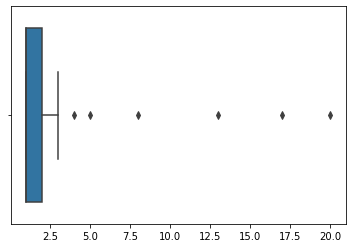

In [9]:
sns.boxplot(TN_df[['Number_Of_Patients']])

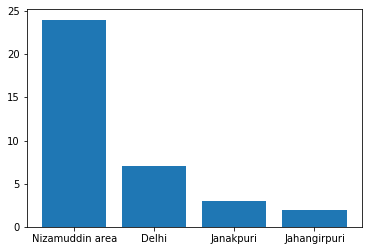

In [10]:
'''
Delhi
'''
# Defining a Bar Graph
plt.bar(DL_df[:4]['City_Name'], DL_df[:4]['Number_Of_Patients'])

# Print the Graph
plt.show()

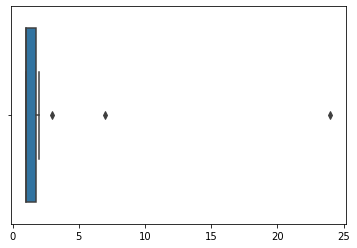

In [11]:
sns.boxplot(DL_df[['Number_Of_Patients']])

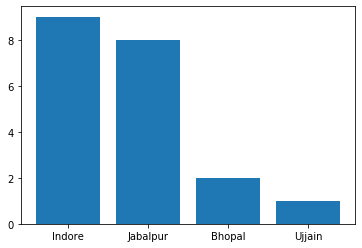

In [12]:
'''
Madhya Pradesh
'''
# Defining a Bar Graph
plt.bar(MP_df[:4]['City_Name'], MP_df[:4]['Number_Of_Patients'])

# Print the Graph
plt.show()

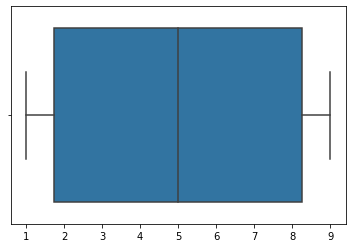

In [13]:
sns.boxplot(MP_df[['Number_Of_Patients']])